In [5]:

import tensorflow as tf
from keras import Sequential,Model
from keras.layers import LSTM, Dense, Input, RepeatVector, TimeDistributed
import numpy as np

from keras.utils import plot_model


In [6]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

print(X)
print(Y)

[[[  5]
  [ 10]
  [ 15]]

 [[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]]
[[[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 repeat_vector (RepeatVector  (None, 3, 100)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 3, 100)            80400     
                                                                 
 time_distributed (TimeDistr  (None, 3, 1)             101       
 ibuted)                                                         
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable

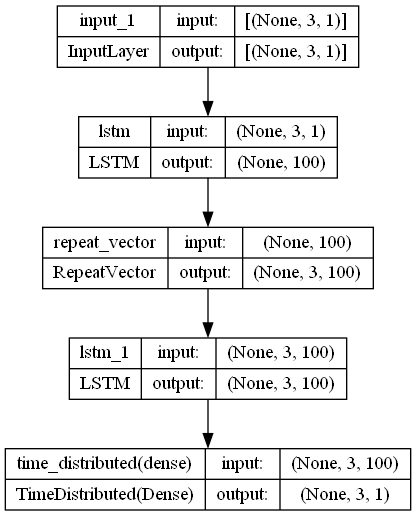

In [7]:

tf.keras.backend.clear_session()

inputs = Input(shape=(3,1))
encoder = LSTM(100, activation="relu", return_sequences=False)(inputs)
repeat = RepeatVector(3)(encoder)
decoder = LSTM(100, activation='relu', return_sequences=True)(repeat)
outputs = TimeDistributed(Dense(1))(decoder)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model (model, to_file = "Many2Many.png", show_shapes = True, show_layer_names = True)

In [8]:
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=1000, validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 22448.7441 - val_loss: 76145.7734
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 21884.2598 - val_loss: 74388.0703
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 21313.1855 - val_loss: 72271.0234
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 20650.1523 - val_loss: 69195.2109
Epoch 5/1000
1/1 [==============================] - 0s 32ms/step - loss: 19857.6777 - val_loss: 65763.3203
Epoch 6/1000
1/1 [==============================] - 0s 31ms/step - loss: 18994.7773 - val_loss: 62457.8320
Epoch 7/1000
1/1 [==============================] - 0s 47ms/step - loss: 18073.3926 - val_loss: 58982.4102
Epoch 8/1000
1/1 [==============================] - 0s 32ms/step - loss: 17037.7559 - val_loss: 55143.2617
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 15836.9424 - val_loss: 50318.5742
Epoch 10/1000
1/1 [====================

In [9]:
test_input = np.array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[315.1625 ]
  [320.95282]
  [326.56204]]]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 41,103
Trainable params: 41,103
Non-trainable params: 0
_________________________________________________________________


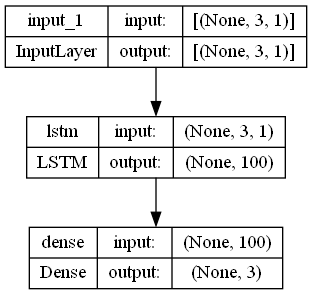

In [15]:


tf.keras.backend.clear_session()

inputs = Input(shape=(3,1))
lstm = LSTM(100, activation="relu", return_sequences=False)(inputs)
outputs = Dense(3)(lstm)

model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model (model, to_file = "Many2Many.png", show_shapes = True, show_layer_names = True)

In [16]:
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=1000, validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 26459.1836 - val_loss: 91840.2500
Epoch 2/1000
1/1 [==============================] - 0s 29ms/step - loss: 26028.6602 - val_loss: 90052.6719
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 25588.9258 - val_loss: 88572.5312
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 25171.3574 - val_loss: 87051.7422
Epoch 5/1000
1/1 [==============================] - 0s 32ms/step - loss: 24759.8516 - val_loss: 85442.7188
Epoch 6/1000
1/1 [==============================] - 0s 31ms/step - loss: 24347.3828 - val_loss: 83906.3281
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 23943.3301 - val_loss: 82496.2500
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 23551.9121 - val_loss: 81177.0234
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 23168.1211 - val_loss: 79879.1562
Epoch 10/1000
1/1 [====================

In [17]:
test_input = np.array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[314.97455 320.62885 326.028  ]]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

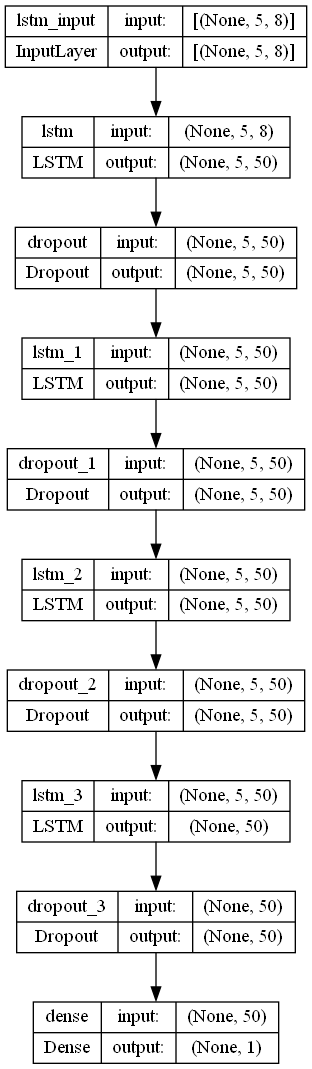

In [21]:
from keras.layers import Dropout
tf.keras.backend.clear_session()
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (5, 8)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.summary()
plot_model (regressor, to_file = "deepLSTM.png", show_shapes = True, show_layer_names = True,show_layer_activations=True,expand_nested=True)